# 获取前n个主成分

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100, size=100)
X[:, 1] = 0.75*X[:, 0] + 3 + np.random.normal(0, 10, size=100)

In [3]:
def demean(X):
    return X - np.mean(X, axis=0)

In [4]:
X_demean = demean(X)

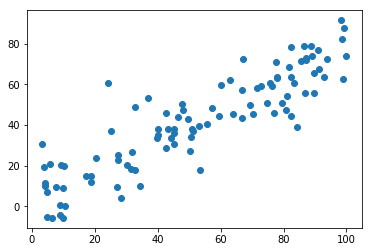

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# demean

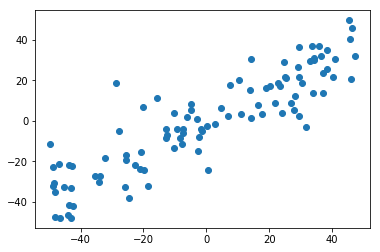

In [6]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [7]:
def f(w, X):
    return np.sum(X.dot(w)**2)/len(X)

In [8]:
def df(w, X):
    return X.T.dot(X.dot(w))*2./len(X)

In [9]:
def direction(w):
    return w/np.linalg.norm(w) #只返回方向

In [10]:
def first_component(X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w= w
        w = w + eta*gradient
        w = direction(w)
        if (abs(f(w, X)-f(last_w, X)) < epsilon):
            break
        cur_iter +=1
    return w

In [11]:
initial_w =  np.random.random(X.shape[1])
initial_w

array([0.78568914, 0.94757194])

In [12]:
eta = 0.001

In [14]:
w = first_component(X_demean, initial_w,eta)
w

array([0.7873189 , 0.61654599])

# 第二主成分

In [15]:
X2 = np.empty(X.shape)

In [16]:
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w)*w

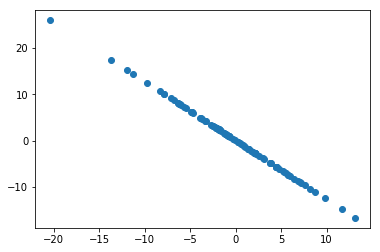

In [17]:
# 绘制
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [18]:
# 向量化
X2 = X - X.dot(w).reshape(-1, 1)*w

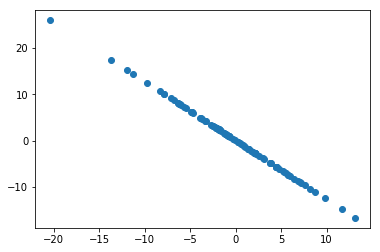

In [20]:
# 绘制
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [21]:
w2 = first_component(X2, initial_w,eta)
w2

array([-0.61653085,  0.78733075])

In [23]:
w.dot(w2)

1.92282399157917e-05

# 求样本x的前n个主成分

In [26]:
def first_n_component(n, X,eta=0.01, n_iters = 1e4, epsilon = 1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1]) 
        w = first_component(X_pca,initial_w,eta )
        res.append(w)
    return res

In [27]:
first_n_component(2, X)

[array([0.78731907, 0.61654576]), array([0.78731931, 0.61654546])]

In [28]:
w

array([0.7873189 , 0.61654599])

In [29]:
w2

array([-0.61653085,  0.78733075])